# Desenvolvimento do modelo machine learning para análise de sentimentos do twitter

In [1]:
# importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk import word_tokenize
import nltk

### Carregando os dados para treinamento do modelo

In [2]:
# carregando o csv com dados do twitter
tweets_df = pd.read_csv('dataset/twitter_sentiments.csv')

In [3]:
tweets_df.head()

,Unnamed: 0,id,tweet,label,tweet_clean
0,0,1512542155436441600,passar a madrugada vendo elite AMÉM,neutro,passar madrugada vendo elite amém
1,1,1512542146418683904,@joaoluizpedrosa Eu assisti algumas produções ...,negativo,@joaoluizpedrosa assisti algumas produções @ne...
2,2,1512542140013985796,Aff já terminei a 5° temperada de elite. Kkkk ...,neutro,aff terminei 5° temperada elite kkkk #elite5
3,3,1512542138931855365,só tem elite na minha tl e eu nem assisto,neutro,elite tl assisto
4,4,1512542132510380034,chorei a ver elite?,neutro,chorei ver elite?


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   12000 non-null  int64 
 1   id           12000 non-null  int64 
 2   tweet        12000 non-null  object
 3   label        12000 non-null  object
 4   tweet_clean  12000 non-null  object
dtypes: int64(2), object(3)
memory usage: 468.9+ KB


In [5]:
tweets_df.columns

Index(['Unnamed: 0', 'id', 'tweet', 'label', 'tweet_clean'], dtype='object')

In [6]:
tweets_df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [7]:
tweets_df.groupby(['label']).count()

,tweet,tweet_clean
label,,
negativo,4369,4369
neutro,4340,4340
positivo,3291,3291


In [8]:
# tranformando valores para adequar aos classificadores
tweets_df['label'] = tweets_df['label'].replace(['negativo', 'neutro', 'positivo'], [0, 1,2])

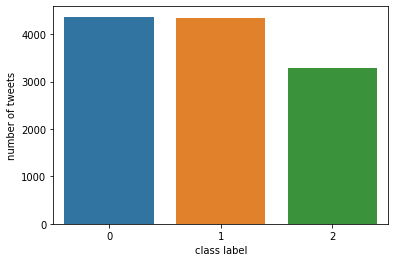

In [9]:
# Visualizando os dados graficamente
sns.countplot(x=tweets_df.label)
plt.xlabel('class label')
plt.ylabel('number of tweets')
plt.show()

In [10]:
tweets_df.groupby(['label']).count()

,tweet,tweet_clean
label,,
0,4369,4369
1,4340,4340
2,3291,3291


## Efetuando a limpeza dos dados

In [11]:
!python -m nltk.downloader stopwords

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# importando a biblioteca de processamento de linguagen natural e a de expreções regulares (regex)
import nltk
import re

# usando as funções stopword e remover os caracteres indesejados
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower() # remove url e tranforma o texto em minusculo
    instancia = re.sub(r'[0-9]+', '', instancia) # remove números
    instancia = re.sub(r'[^\w\s]','', instancia) # remove pontuação
    instancia = re.sub('[!#$%^&*()]', '', instancia) #remove caractéres espaciais
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [13]:
# remover emojis utilizado regex (re)
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [14]:
# aplicando a função de limpeza de dados:
tweets_df['tweet_clean'] = [Preprocessing(i) for i in tweets_df['tweet_clean']]
tweets_df['tweet_clean'] = [remove_emoji(i) for i in tweets_df['tweet_clean']]
pd.set_option('display.max_colwidth', None) 

tweets_df.head()

,tweet,label,tweet_clean
0,passar a madrugada vendo elite AMÉM,1,passar madrugada vendo elite amém
1,@joaoluizpedrosa Eu assisti algumas produções da @NetflixES e reparei que a maioria quase não tem negros no elenco… https://t.co/H8kBpauEz8,0,joaoluizpedrosa assisti algumas produções netflixes reparei maioria quase negros elenco
2,Aff já terminei a 5° temperada de elite. Kkkk #Elite5,1,aff terminei temperada elite kkkk elite
3,só tem elite na minha tl e eu nem assisto,1,elite tl assisto
4,chorei a ver elite?,1,chorei ver elite


# Lematização

In [15]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download pt_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-08-06 14:47:00.328624: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/explosion/spacy-models/releases/download/pt_core_news_sm-3.4.0/pt_core_news_sm-3.4.0-py3-none-any.whl (13.0 MB)
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [16]:
import spacy
nlp = spacy.load('pt_core_news_sm')

In [17]:
tweets_df['tweet_lemma'] = tweets_df['tweet_clean'].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))
tweets_df['tweet_lemma'] = [Preprocessing(i) for i in tweets_df['tweet_lemma']]
tweets_df.head()

,tweet,label,tweet_clean,tweet_lemma
0,passar a madrugada vendo elite AMÉM,1,passar madrugada vendo elite amém,passar madrugada ver elite amém
1,@joaoluizpedrosa Eu assisti algumas produções da @NetflixES e reparei que a maioria quase não tem negros no elenco… https://t.co/H8kBpauEz8,0,joaoluizpedrosa assisti algumas produções netflixes reparei maioria quase negros elenco,joaoluizpedroso assisti algum produção netflixe reparar maioria quase negro elenco
2,Aff já terminei a 5° temperada de elite. Kkkk #Elite5,1,aff terminei temperada elite kkkk elite,aff terminei temperar elite kkkk elite
3,só tem elite na minha tl e eu nem assisto,1,elite tl assisto,elite tl assisto
4,chorei a ver elite?,1,chorei ver elite,chorar ver elite


## Lematização (outra forma)

In [18]:
!pip install simplemma

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 MB 8.4 MB/s eta 0:00:00


In [19]:
import simplemma
from simplemma import text_lemmatizer

In [20]:
tweets_df['tweet_lemma_2'] = [text_lemmatizer(linha, lang='pt') for linha in tweets_df['tweet_clean']] #lematizando o texto
tweets_df['tweet_lemma_2'] = [' '.join(palavra) for palavra in tweets_df['tweet_lemma_2']] #juntando o texto novamente
tweets_df.head()

,tweet,label,tweet_clean,tweet_lemma,tweet_lemma_2
0,passar a madrugada vendo elite AMÉM,1,passar madrugada vendo elite amém,passar madrugada ver elite amém,passar madrugar vendar elite amém
1,@joaoluizpedrosa Eu assisti algumas produções da @NetflixES e reparei que a maioria quase não tem negros no elenco… https://t.co/H8kBpauEz8,0,joaoluizpedrosa assisti algumas produções netflixes reparei maioria quase negros elenco,joaoluizpedroso assisti algum produção netflixe reparar maioria quase negro elenco,joaoluizpedrosa assistir algum produção netflixes reparar maioria quase negro elenco
2,Aff já terminei a 5° temperada de elite. Kkkk #Elite5,1,aff terminei temperada elite kkkk elite,aff terminei temperar elite kkkk elite,aff terminar temperado elite kkkk elite
3,só tem elite na minha tl e eu nem assisto,1,elite tl assisto,elite tl assisto,elite tl assistir
4,chorei a ver elite?,1,chorei ver elite,chorar ver elite,chorar ver elite


# Trabalhando no equilibrio dos dados

### Iniciando o trabalho de balanceamento dos dados

In [21]:
# criando a lista sentimentos (com as quantidades das classes)
sentimentos = []
sentimentos.append(tweets_df.loc[tweets_df['label'] == 0]['label'].count())
sentimentos.append(tweets_df.loc[tweets_df['label'] == 1]['label'].count())
sentimentos.append(tweets_df.loc[tweets_df['label'] == 2]['label'].count())

sentimentos

[4369, 4340, 3291]

In [22]:
# colacando a lista sentimento em ordem (minoria, meio, maioria)
sentimentos.sort()
sentimentos

[3291, 4340, 4369]

In [23]:
# instanciando as classes de sentimentos
sent = [0, 0, 0]
for i in range(len(sentimentos)):
  for j in range(len(sentimentos)):
    if sentimentos[i] ==tweets_df.loc[tweets_df['label'] == j]['label'].count():
      sent[i] = tweets_df.loc[tweets_df['label'] == j]

minoria = sent[0]
meio = sent[1]
maioria = sent[2]

In [24]:
print('Maioria \n{}\n'.format(maioria['label'].count()))
print('Meio \n{}\n'.format(meio['label'].count()))
print('Minoria \n{}'.format(minoria['label'].count()))

Maioria 
4369

Meio 
4340

Minoria 
3291


In [25]:
print('Maioria \n{}\n'.format(maioria['label'].count()))
print('Meio \n{}\n'.format(meio['label'].count()))
print('Minoria \n{}'.format(minoria['label'].count()))

Maioria 
4369

Meio 
4340

Minoria 
3291


## Igualando a quantidade de tweets entre positivo, negativo e neutro

#### Oversampling (sobreamostragem)

In [26]:
from sklearn.utils import resample

menor_maior = resample(minoria, replace=True, n_samples=len(maioria), random_state=123)
meio_maior = resample(meio, replace=True, n_samples=len(maioria), random_state=123)


In [27]:
print(menor_maior.count(), meio_maior.count(), maioria.count())

tweet            4369
label            4369
tweet_clean      4369
tweet_lemma      4369
tweet_lemma_2    4369
dtype: int64 tweet            4369
label            4369
tweet_clean      4369
tweet_lemma      4369
tweet_lemma_2    4369
dtype: int64 tweet            4369
label            4369
tweet_clean      4369
tweet_lemma      4369
tweet_lemma_2    4369
dtype: int64


In [28]:
# juntando os dataframes
tweets_df_equilibrado_maior = pd.concat([menor_maior, meio_maior, maioria])

# resetando o index
tweets_df_equilibrado_maior = tweets_df_equilibrado_maior.reset_index()

# removendo a coluna index
tweets_df_equilibrado_maior.drop(columns=['index'], inplace=True)

In [29]:
tweets_df_equilibrado_maior.head()

,tweet,label,tweet_clean,tweet_lemma,tweet_lemma_2
0,Arthur campeão,2,arthur campeão,arthur campeão,arthur campeão
1,mds elite virou porno puro 😧,2,mds elite virou porno puro,mds elite virar porno puro,mds elite virar porno puro
2,@picpay @Aguiarthur ARTHUR CAMPEÃO,2,picpay aguiarthur arthur campeão,picpay aguiarthur arthur campeão,picpay aguiarthur arthur campeão
3,"Enquanto Nenê for nosso camisa 10, a gente não vai ganhar partidas",2,enquanto nenê camisa gente vai ganhar partidas,enquanto nenê camisa gente ir ganhar partida,enquanto nenê camisa gente ir ganhar partida
4,"Pra mim a aliança do Lula com o Alckmin foi uma dois maiores estratégias políticas da nossa história recente, é visionário.",2,pra mim aliança lula alckmin dois maiores estratégias políticas história recente visionário,pra aliança lula alckmin dois grande estratégia político história recente visionário,pra mim aliançar lula alckmin dois maior estratégia política história recente visionário


In [30]:
tweets_df_equilibrado_maior.groupby(['label']).count()

,tweet,tweet_clean,tweet_lemma,tweet_lemma_2
label,,,,
0,4369,4369,4369,4369
1,4369,4369,4369,4369
2,4369,4369,4369,4369


### Undersampling (subamostragem)

In [31]:
maior_menor = resample(maioria, replace=True, n_samples=len(minoria), random_state=123)
meio_menor = resample(meio, replace=True, n_samples=len(minoria), random_state=123)

In [32]:
print(minoria.count(), meio_menor.count(), maior_menor.count() )

tweet            3291
label            3291
tweet_clean      3291
tweet_lemma      3291
tweet_lemma_2    3291
dtype: int64 tweet            3291
label            3291
tweet_clean      3291
tweet_lemma      3291
tweet_lemma_2    3291
dtype: int64 tweet            3291
label            3291
tweet_clean      3291
tweet_lemma      3291
tweet_lemma_2    3291
dtype: int64


In [33]:
# juntando os dataframes
tweets_df_equilibrado_menor = pd.concat([minoria, meio_menor, maior_menor])

# resetando o index
tweets_df_equilibrado_menor = tweets_df_equilibrado_menor.reset_index()

# removendo a coluna index
tweets_df_equilibrado_menor.drop(columns=['index'], inplace=True)

In [34]:
tweets_df_equilibrado_menor.head()

,tweet,label,tweet_clean,tweet_lemma,tweet_lemma_2
0,Eu rir tanto com essa cena kkkkkk #elite,2,rir tanto cena kkkkkk elite,rir tanto cena kkkkkk elite,rir tanto cena kkkkkk elite
1,comecei elite e pqp já gostei,2,comecei elite pqp gostei,começar elite pqp gostar,começar elite pqp gostar
2,"Meu deus, eu tô no chao com elite kkkkkkkk",2,deus tô chao elite kkkkkkkk,deus tô chao elite kkkkkkkk,deus tô chao elite kkkkkkkk
3,Esse brasileiro que tá em elite é um gostoso pqp,2,brasileiro tá elite gostoso pqp,brasileiro tá elite gostoso pqp,brasileiro tá elite gostoso pqp
4,Saudades de quando os roles com meus amigos era igual as festas de elite,2,saudades roles amigos igual festas elite,saudade role amigo igual festa elite,saudade rolar amigo igual festa elite


# Machine Learning - Utils

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Vetorizadores
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Classificadores
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB

# Avaliador
from sklearn.model_selection import cross_val_predict

In [36]:
# Tokenização especial para tweets
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer()

In [37]:
# função para escolher os pipelines dos modelos a serem treinados
def escolher_pipeline(pipe):
    
    if(pipe == 1):
        modelo_sgd_countvec = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', SGDClassifier())
        ])
        return modelo_sgd_countvec
    
    elif(pipe == 2):
        modelo_sgd_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', SGDClassifier())
        ])
        return modelo_sgd_tfidf
    
    elif(pipe == 3):
        modelo_nb_countvec = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', MultinomialNB())
        ])
        return modelo_nb_countvec
    
    elif(pipe == 4):
        modelo_nb_tfidf = Pipeline([
            ('tfidfVectorizer', TfidfVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', MultinomialNB())
        ])
        return modelo_nb_tfidf

In [38]:
!pip install confplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import confplot

# função que exibe a matrix de confusão para avalização do modelo
def matriz_confusao(y_test, modelo_predicao):
    
    # imprimir relatório de classificação
    print("Relatório de Classificação:\n", metrics.classification_report(y_test, modelo_predicao))
    
    # imprimir a acurácia do modelo
    print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, modelo_predicao)))
    
    # imprimir a matrix de confusão
    print("Matrix de confusão:\n", pd.crosstab(y_test, modelo_predicao,rownames=['Real'], colnames=['Predito'], margins=True),  '')
    
    # plotar a matrix de confusão
    cm = confusion_matrix(y_target = y_test, 
                            y_predicted = modelo_predicao, binary=False)
    fig, ax = plot_confusion_matrix(conf_mat = cm)
    plt.show()
    print('\n')
    
    # plotar a matrix de confusão (mais completo)
    y_true = y_test
    y_pred = modelo_predicao
    columns = ['negativo', 'neutro', 'positivo']
    confplot.plot_confusion_matrix_from_data(y_true, y_pred, columns)

# Machine Learning - Construindo modelo com dados Undersampling

In [40]:
X_1 = tweets_df_equilibrado_menor['tweet_lemma']
y_1 = tweets_df_equilibrado_menor['label']

X_1.shape, y_1.shape

((9873,), (9873,))

In [41]:
#separando treino e teste
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.25, random_state=123)

In [42]:
X_train_1.shape, y_train_1.shape, X_test_1.shape, y_test_1.shape

((7404,), (7404,), (2469,), (2469,))

## Modelo 1 (CountVectorizer e SGDClassifier)

In [43]:
modelo1_under = escolher_pipeline(1)
modelo1_under = modelo1_under.fit(X_train_1, y_train_1)
modelo1_pred_under = modelo1_under.predict(X_test_1)

In [44]:
modelo1_pred_under

array([2, 1, 2, ..., 1, 0, 0])

### Avaliando o modelo 1

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86       801
           1       0.84      0.91      0.87       827
           2       0.93      0.88      0.91       841

    accuracy                           0.88      2469
   macro avg       0.88      0.88      0.88      2469
weighted avg       0.88      0.88      0.88      2469

Acurácia: 0.8801

Matrix de confusão:
 Predito    0    1    2   All
Real                        
0        675   86   40   801
1         54  754   19   827
2         40   57  744   841
All      769  897  803  2469 


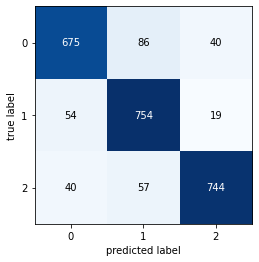

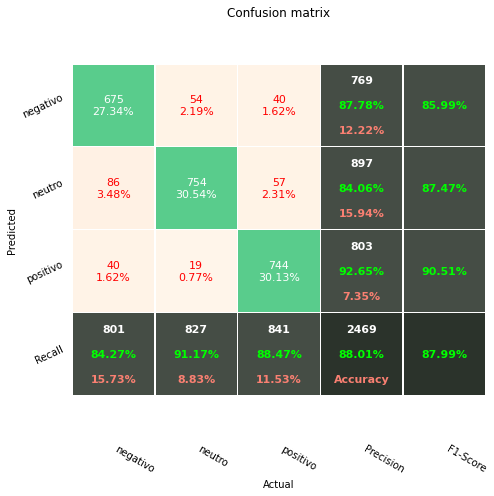

In [45]:
matriz_confusao(y_test_1, modelo1_pred_under)

### Validação cruzada - modelo 1

In [46]:
validacao_cruzada1 = cross_val_predict(modelo1_under, X_1, y_1, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88      3291
           1       0.84      0.92      0.88      3291
           2       0.93      0.88      0.90      3291

    accuracy                           0.89      9873
   macro avg       0.89      0.89      0.89      9873
weighted avg       0.89      0.89      0.89      9873

Acurácia: 0.8862

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        2818   331   142  3291
1         158  3044    89  3291
2         160   244  2887  3291
All      3136  3619  3118  9873 


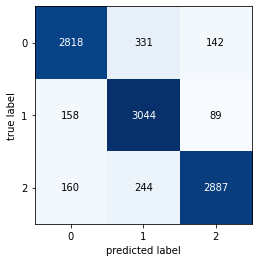

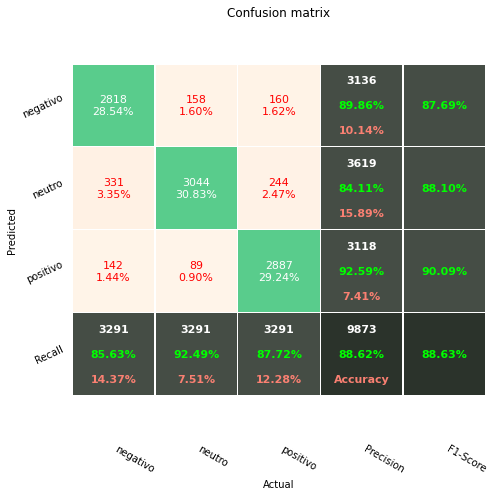

In [47]:
matriz_confusao(y_1, validacao_cruzada1)

## Modelo 2 (TfidfVectorizer e SGDClassifier)

In [48]:
modelo2_under = escolher_pipeline(2)
modelo2_under = modelo2_under.fit(X_train_1, y_train_1)
modelo2_pred_under = modelo2_under.predict(X_test_1)

In [49]:
modelo2_pred_under

array([2, 1, 2, ..., 1, 0, 0])

### Avaliando o modelo 2

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       801
           1       0.84      0.87      0.86       827
           2       0.93      0.88      0.90       841

    accuracy                           0.87      2469
   macro avg       0.87      0.87      0.87      2469
weighted avg       0.87      0.87      0.87      2469

Acurácia: 0.8667

Matrix de confusão:
 Predito    0    1    2   All
Real                        
0        679   84   38   801
1         84  723   20   827
2         52   51  738   841
All      815  858  796  2469 


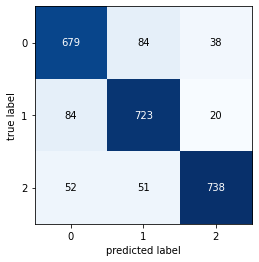

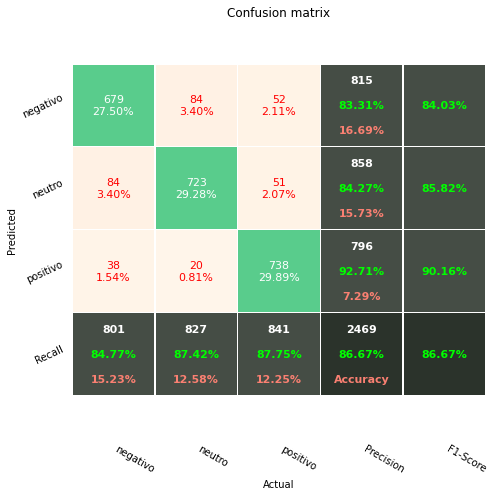

In [50]:
matriz_confusao(y_test_1, modelo2_pred_under)

### Validação cruzada - modelo 2

In [51]:
validacao_cruzada2 = cross_val_predict(modelo2_under, X_1, y_1, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      3291
           1       0.83      0.89      0.86      3291
           2       0.90      0.87      0.89      3291

    accuracy                           0.86      9873
   macro avg       0.87      0.86      0.87      9873
weighted avg       0.87      0.86      0.87      9873

Acurácia: 0.8649

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        2763   359   169  3291
1         238  2917   136  3291
2         206   226  2859  3291
All      3207  3502  3164  9873 


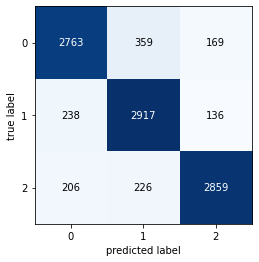

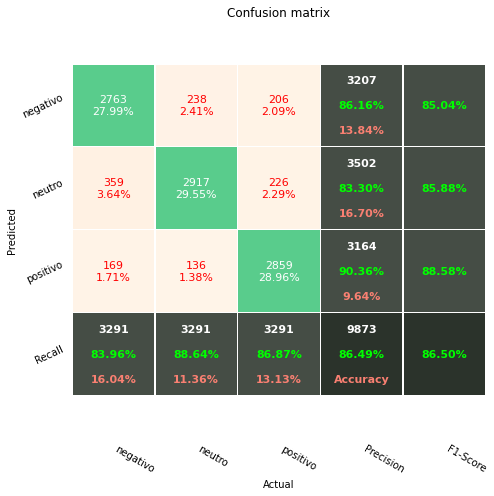

In [52]:
matriz_confusao(y_1, validacao_cruzada2)

## Modelo 3 (CountVectorizer e MultinomialNB)

In [53]:
modelo3_under = escolher_pipeline(3)
modelo3_under = modelo3_under.fit(X_train_1, y_train_1)
modelo3_pred_under = modelo3_under.predict(X_test_1)

In [54]:
modelo3_pred_under

array([2, 1, 2, ..., 1, 1, 0])

### Avaliando o modelo 3

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.70      0.83      0.76       801
           1       0.82      0.74      0.78       827
           2       0.86      0.78      0.82       841

    accuracy                           0.78      2469
   macro avg       0.79      0.78      0.78      2469
weighted avg       0.79      0.78      0.79      2469

Acurácia: 0.7837

Matrix de confusão:
 Predito    0    1    2   All
Real                        
0        666   80   55   801
1        164  614   49   827
2        127   59  655   841
All      957  753  759  2469 


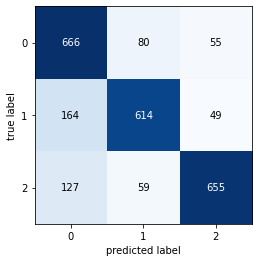

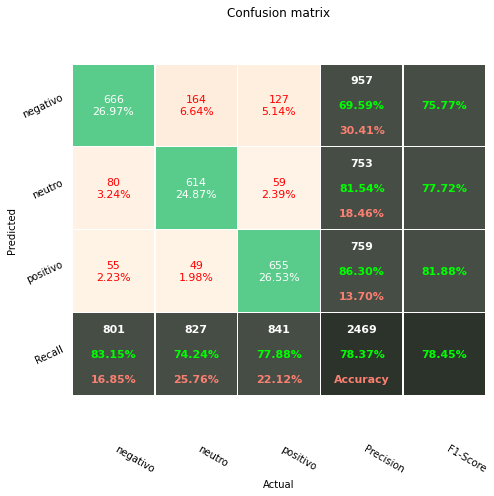

In [55]:
matriz_confusao(y_test_1, modelo3_pred_under)

### Validação cruzada - modelo 3

In [56]:
validacao_cruzada3 = cross_val_predict(modelo3_under, X_1, y_1, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.73      0.84      0.78      3291
           1       0.82      0.78      0.80      3291
           2       0.86      0.77      0.81      3291

    accuracy                           0.80      9873
   macro avg       0.80      0.80      0.80      9873
weighted avg       0.80      0.80      0.80      9873

Acurácia: 0.7970

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        2772   303   216  3291
1         542  2564   185  3291
2         497   261  2533  3291
All      3811  3128  2934  9873 


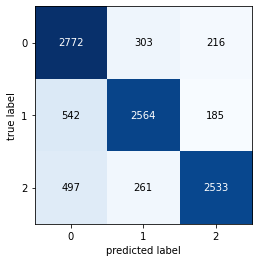

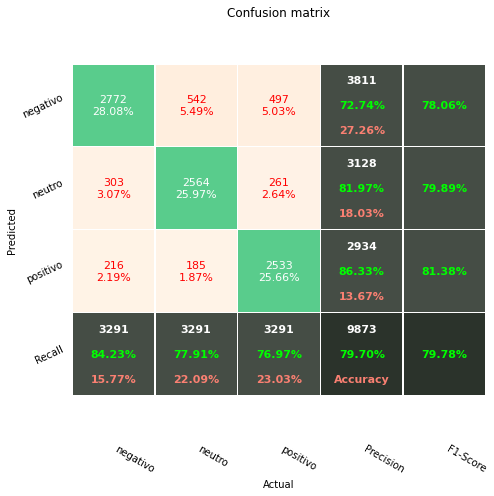

In [57]:
matriz_confusao(y_1, validacao_cruzada3)

## Modelo 4 (TfidfVectorizer e MultinomialNB)

In [58]:
modelo4_under = escolher_pipeline(4)
modelo4_under = modelo4_under.fit(X_train_1, y_train_1)
modelo4_pred_under = modelo4_under.predict(X_test_1)

In [59]:
modelo4_pred_under

array([2, 1, 2, ..., 1, 0, 0])

### Avaliando o modelo 4

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.68      0.84      0.75       801
           1       0.82      0.74      0.78       827
           2       0.87      0.76      0.82       841

    accuracy                           0.78      2469
   macro avg       0.79      0.78      0.78      2469
weighted avg       0.79      0.78      0.78      2469

Acurácia: 0.7813

Matrix de confusão:
 Predito    0    1    2   All
Real                        
0        676   76   49   801
1        173  610   44   827
2        141   57  643   841
All      990  743  736  2469 


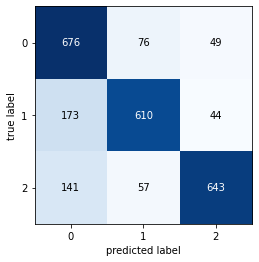

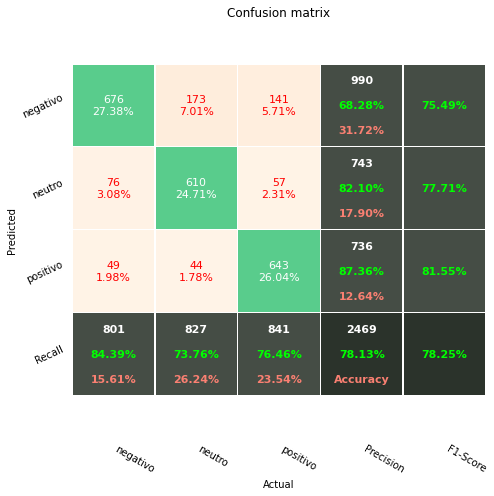

In [60]:
matriz_confusao(y_test_1, modelo4_pred_under)

### Validação cruzada - modelo 4

In [61]:
validacao_cruzada4 = cross_val_predict(modelo4_under, X_1, y_1, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.72      0.85      0.78      3291
           1       0.83      0.78      0.81      3291
           2       0.88      0.76      0.82      3291

    accuracy                           0.80      9873
   macro avg       0.81      0.80      0.80      9873
weighted avg       0.81      0.80      0.80      9873

Acurácia: 0.8007

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        2813   287   191  3291
1         545  2583   163  3291
2         528   254  2509  3291
All      3886  3124  2863  9873 


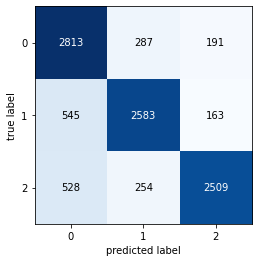

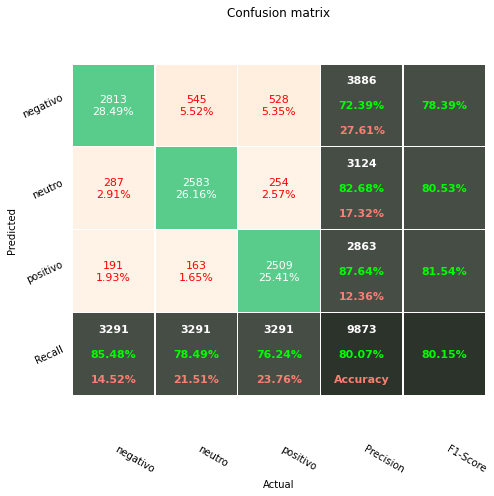

In [62]:
matriz_confusao(y_1, validacao_cruzada4)

# Machine Learning - Construindo modelo com dados originais


In [63]:
X_2 = tweets_df['tweet_lemma']
y_2 = tweets_df['label']

In [64]:
X_2.shape, y_2.shape

((12000,), (12000,))

In [65]:
X_train_2, X_text_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.25, random_state=123)
X_train_2.shape, y_train_2.shape, X_text_2.shape, y_test_2.shape

((9000,), (9000,), (3000,), (3000,))

## Modelo 1 (CountVectorizer e SGDClassifier)

In [66]:
modelo1_orig = escolher_pipeline(1)
modelo1_orig = modelo1_orig.fit(X_train_2, y_train_2)
modelo1_pred_orig = modelo1_orig.predict(X_text_2)

In [67]:
modelo1_pred_orig

array([2, 1, 1, ..., 1, 1, 2])

### Avaliando o modelo 1


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      1085
           1       0.82      0.90      0.86      1093
           2       0.87      0.85      0.86       822

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000

Acurácia: 0.8487

Matrix de confusão:
 Predito     0     1    2   All
Real                          
0         863   151   71  1085
1          80   982   31  1093
2          58    63  701   822
All      1001  1196  803  3000 


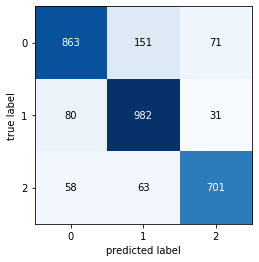

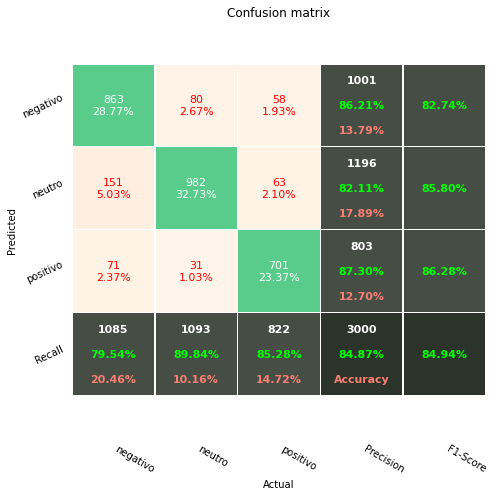

In [68]:
matriz_confusao(y_test_2, modelo1_pred_orig)

### Validação cruzada - modelo 1

In [69]:
validacao_cruzada1 = cross_val_predict(modelo1_orig, X_2, y_2, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      4369
           1       0.83      0.90      0.86      4340
           2       0.89      0.87      0.88      3291

    accuracy                           0.86     12000
   macro avg       0.87      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000

Acurácia: 0.8608

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        3552   589   228   4369
1         316  3913   111   4340
2         192   235  2864   3291
All      4060  4737  3203  12000 


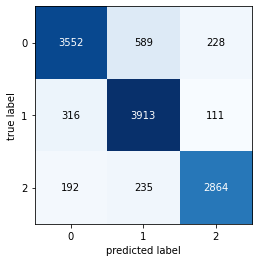

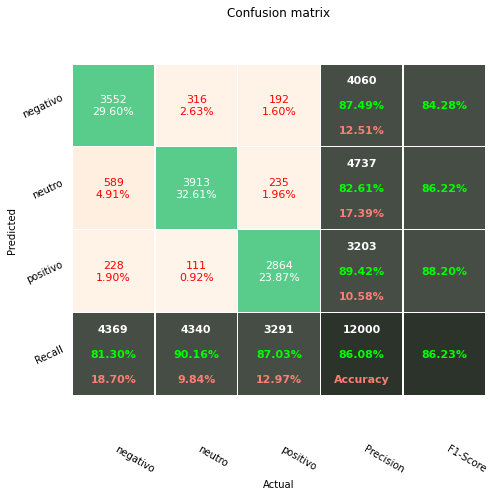

In [70]:
matriz_confusao(y_2, validacao_cruzada1)

## Modelo 2 (TfidfVectorizer e SGDClassifier)

In [71]:
modelo2_orig = escolher_pipeline(2)
modelo2_orig = modelo2_under.fit(X_train_2, y_train_2)
modelo2_pred_orig = modelo2_orig.predict(X_text_2)

In [72]:
modelo2_pred_orig

array([0, 1, 1, ..., 1, 1, 2])

### Avaliando o modelo 2

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1085
           1       0.82      0.85      0.84      1093
           2       0.86      0.83      0.84       822

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.83      3000

Acurácia: 0.8297

Matrix de confusão:
 Predito     0     1    2   All
Real                          
0         877   139   69  1085
1         120   929   44  1093
2          75    64  683   822
All      1072  1132  796  3000 


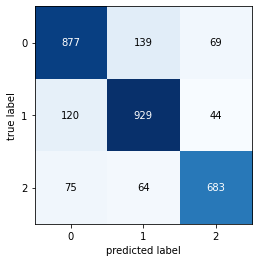

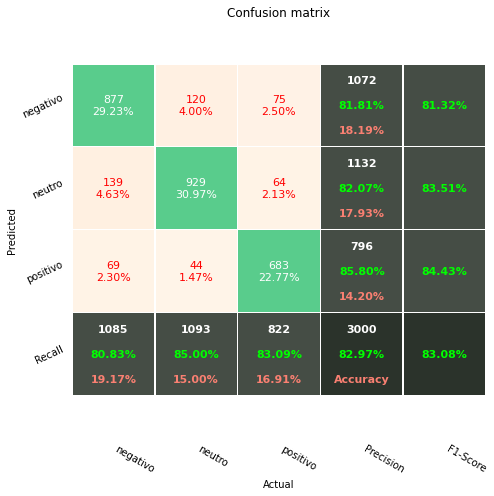

In [73]:
matriz_confusao(y_test_2, modelo2_pred_orig)

### Validação cruzada - modelo 2

In [74]:
validacao_cruzada2 = cross_val_predict(modelo2_orig, X_2, y_2, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      4369
           1       0.81      0.87      0.84      4340
           2       0.89      0.84      0.86      3291

    accuracy                           0.84     12000
   macro avg       0.85      0.84      0.84     12000
weighted avg       0.84      0.84      0.84     12000

Acurácia: 0.8407

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        3552   607   210   4369
1         426  3785   129   4340
2         280   259  2752   3291
All      4258  4651  3091  12000 


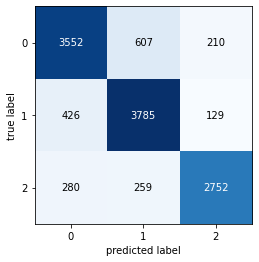

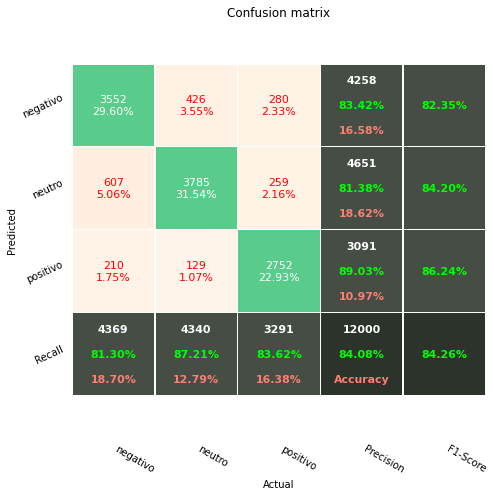

In [75]:
matriz_confusao(y_2, validacao_cruzada2)

## Modelo 3 (CountVectorizer e MultinomialNB)

In [76]:
modelo3_orig = escolher_pipeline(3)
modelo3_orig = modelo3_under.fit(X_train_2, y_train_2)
modelo3_pred_orig = modelo3_orig.predict(X_text_2)

In [77]:
modelo3_pred_orig

array([0, 1, 0, ..., 1, 1, 2])

### Avaliando o modelo 3

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.67      0.83      0.74      1085
           1       0.81      0.72      0.76      1093
           2       0.85      0.71      0.77       822

    accuracy                           0.76      3000
   macro avg       0.78      0.75      0.76      3000
weighted avg       0.77      0.76      0.76      3000

Acurácia: 0.7577

Matrix de confusão:
 Predito     0    1    2   All
Real                         
0         904  118   63  1085
1         268  786   39  1093
2         173   66  583   822
All      1345  970  685  3000 


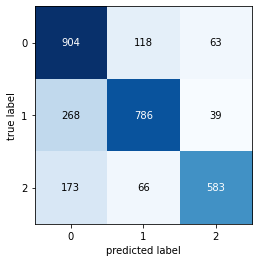

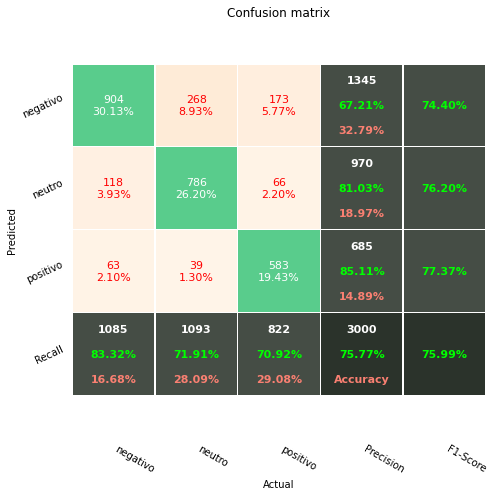

In [78]:
matriz_confusao(y_test_2, modelo3_pred_orig)

### Validação cruzada - modelo 3

In [79]:
validacao_cruzada3 = cross_val_predict(modelo3_orig, X_2, y_2, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.70      0.84      0.76      4369
           1       0.81      0.75      0.78      4340
           2       0.86      0.72      0.78      3291

    accuracy                           0.77     12000
   macro avg       0.79      0.77      0.77     12000
weighted avg       0.78      0.77      0.77     12000

Acurácia: 0.7717

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        3650   491   228   4369
1         939  3244   157   4340
2         656   269  2366   3291
All      5245  4004  2751  12000 


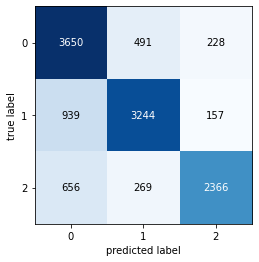

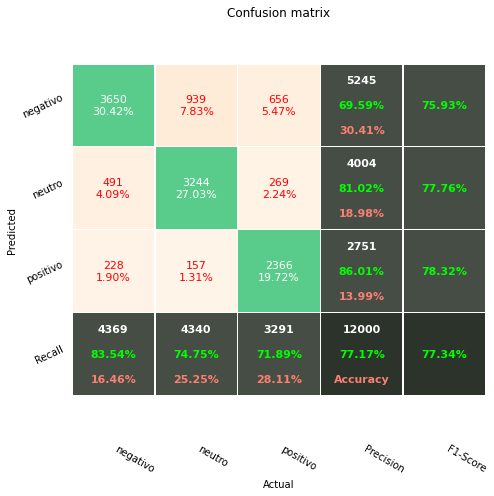

In [80]:
matriz_confusao(y_2, validacao_cruzada3)

## Modelo 4 (TfidfVectorizer e MultinomialNB)

In [81]:
modelo4_orig = escolher_pipeline(4)
modelo4_orig = modelo4_under.fit(X_train_2, y_train_2)
modelo4_pred_orig = modelo4_orig.predict(X_text_2)

In [82]:
modelo4_pred_orig

array([0, 1, 0, ..., 1, 1, 2])

### Avaliando o modelo 4

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.64      0.87      0.74      1085
           1       0.79      0.72      0.75      1093
           2       0.91      0.59      0.72       822

    accuracy                           0.74      3000
   macro avg       0.78      0.73      0.74      3000
weighted avg       0.77      0.74      0.74      3000

Acurácia: 0.7383

Matrix de confusão:
 Predito     0    1    2   All
Real                         
0         942  111   32  1085
1         292  784   17  1093
2         230  103  489   822
All      1464  998  538  3000 


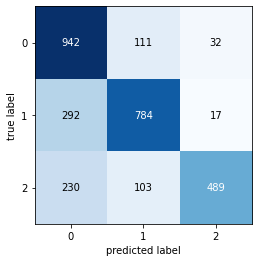

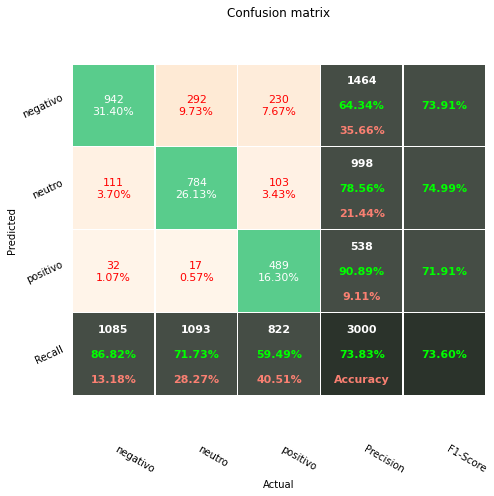

In [83]:
matriz_confusao(y_test_2, modelo4_pred_orig)

### Validação cruzada - modelo 4

In [84]:
validacao_cruzada4 = cross_val_predict(modelo4_orig, X_2, y_2, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.67      0.86      0.76      4369
           1       0.80      0.76      0.78      4340
           2       0.91      0.64      0.75      3291

    accuracy                           0.76     12000
   macro avg       0.80      0.75      0.76     12000
weighted avg       0.79      0.76      0.76     12000

Acurácia: 0.7634

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        3773   462   134   4369
1         978  3287    75   4340
2         844   346  2101   3291
All      5595  4095  2310  12000 


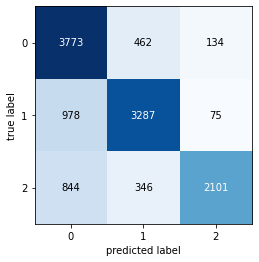

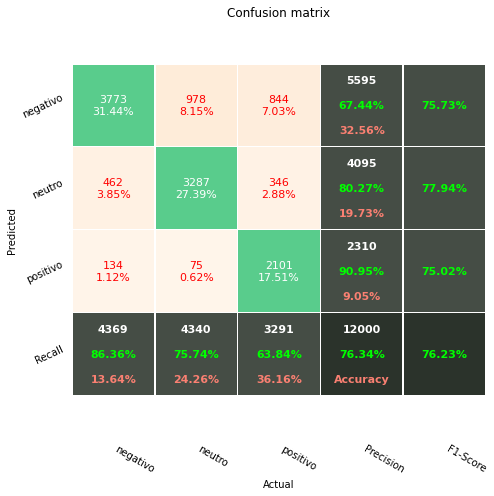

In [85]:
matriz_confusao(y_2, validacao_cruzada4)

# Machine Learning - Construindo modelo com dados oversampling

In [86]:
X_3 = tweets_df_equilibrado_maior['tweet_lemma']
y_3 = tweets_df_equilibrado_maior['label']

X_3.shape, y_3.shape

((13107,), (13107,))

In [87]:
X_train_3, X_text_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.25, random_state=123)

In [88]:
X_train_3.shape, y_train_3.shape, X_text_3.shape, y_test_3.shape

((9830,), (9830,), (3277,), (3277,))

## Modelo 1 (CountVectorizer e SGDClassifier)

In [89]:
modelo1_over = escolher_pipeline(1)
modelo1_over = modelo1_over.fit(X_train_3, y_train_3)
modelo1_pred_over = modelo1_over.predict(X_text_3)

In [90]:
modelo1_pred_over

array([2, 1, 1, ..., 1, 1, 1])

### Avaliando o modelo 1

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86      1078
           1       0.85      0.93      0.89      1107
           2       0.93      0.93      0.93      1092

    accuracy                           0.89      3277
   macro avg       0.89      0.89      0.89      3277
weighted avg       0.89      0.89      0.89      3277

Acurácia: 0.8920

Matrix de confusão:
 Predito    0     1     2   All
Real                          
0        881   145    52  1078
1         60  1024    23  1107
2         37    37  1018  1092
All      978  1206  1093  3277 


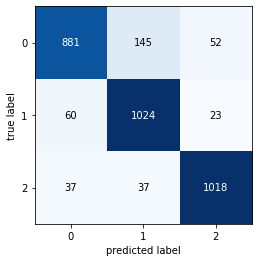

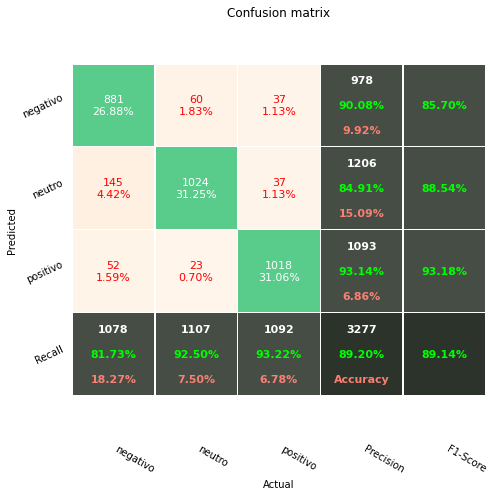

In [91]:
matriz_confusao(y_test_3, modelo1_pred_over)

### Validação cruzada - modelo 1

In [92]:
validacao_cruzada1 = cross_val_predict(modelo1_over, X_3, y_3, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.91      0.82      0.86      4369
           1       0.86      0.93      0.89      4369
           2       0.93      0.95      0.94      4369

    accuracy                           0.90     13107
   macro avg       0.90      0.90      0.90     13107
weighted avg       0.90      0.90      0.90     13107

Acurácia: 0.8999

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        3588   569   212   4369
1         214  4078    77   4369
2         129   111  4129   4369
All      3931  4758  4418  13107 


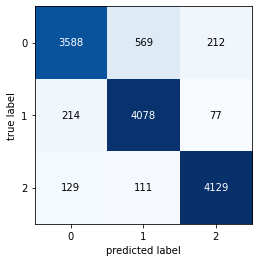

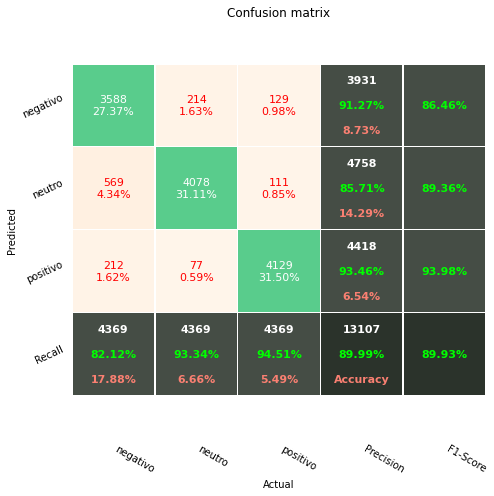

In [93]:
matriz_confusao(y_3, validacao_cruzada1)

## Modelo 2 (TfidfVectorizer e SGDClassifier)

In [94]:
modelo2_over = escolher_pipeline(2)
modelo2_over = modelo2_over.fit(X_train_3, y_train_3)
modelo2_pred_over = modelo2_over.predict(X_text_3)

In [95]:
modelo2_pred_over

array([2, 1, 1, ..., 1, 1, 1])

### Avaliando o modelo 2

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      1078
           1       0.85      0.89      0.87      1107
           2       0.92      0.91      0.91      1092

    accuracy                           0.87      3277
   macro avg       0.87      0.87      0.87      3277
weighted avg       0.87      0.87      0.87      3277

Acurácia: 0.8727

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0         889   135    54  1078
1          94   981    32  1107
2          64    38   990  1092
All      1047  1154  1076  3277 


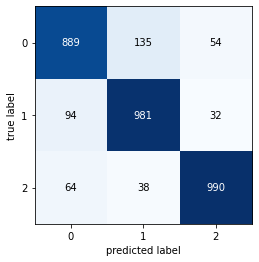

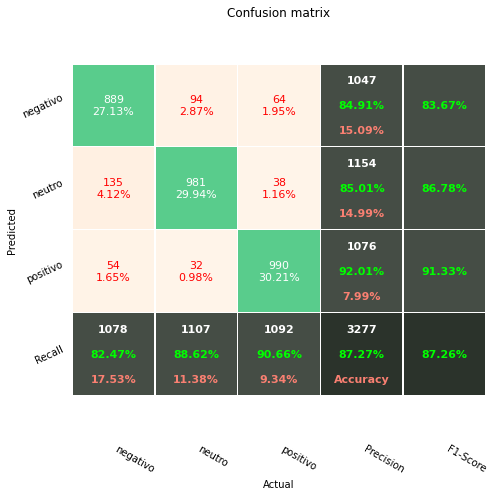

In [96]:
matriz_confusao(y_test_3, modelo2_pred_over)

### Validação cruzada - modelo 2

In [97]:
validacao_cruzada2 = cross_val_predict(modelo2_over, X_3, y_3, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84      4369
           1       0.85      0.90      0.87      4369
           2       0.92      0.93      0.92      4369

    accuracy                           0.88     13107
   macro avg       0.88      0.88      0.88     13107
weighted avg       0.88      0.88      0.88     13107

Acurácia: 0.8798

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        3558   565   246   4369
1         324  3929   116   4369
2         184   140  4045   4369
All      4066  4634  4407  13107 


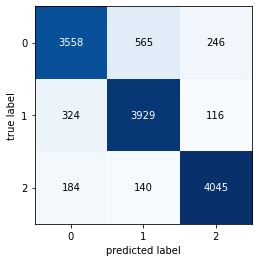

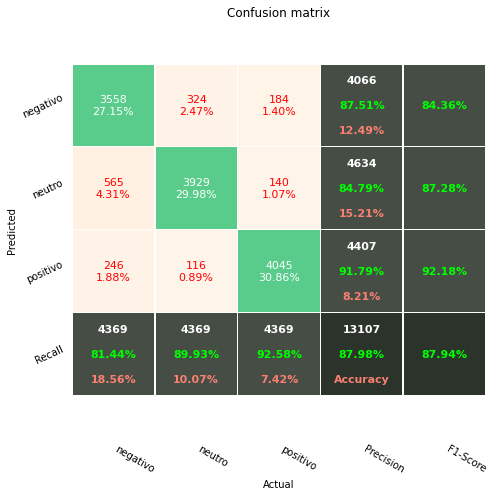

In [98]:
matriz_confusao(y_3, validacao_cruzada2)

## Modelo 3 (CountVectorizer e MultinomialNB)

In [99]:
modelo3_over = escolher_pipeline(3)
modelo3_over = modelo3_over.fit(X_train_3, y_train_3)
modelo3_pred_over = modelo3_over.predict(X_text_3)

In [100]:
modelo3_pred_over

array([2, 0, 1, ..., 1, 1, 1])

### Avaliando o modelo 3

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78      1078
           1       0.86      0.79      0.82      1107
           2       0.87      0.84      0.85      1092

    accuracy                           0.82      3277
   macro avg       0.82      0.82      0.82      3277
weighted avg       0.82      0.82      0.82      3277

Acurácia: 0.8169

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0         891   107    80  1078
1         180   874    53  1107
2         140    40   912  1092
All      1211  1021  1045  3277 


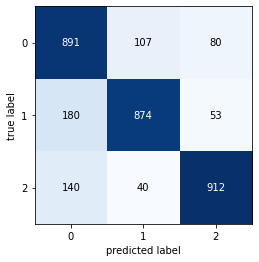

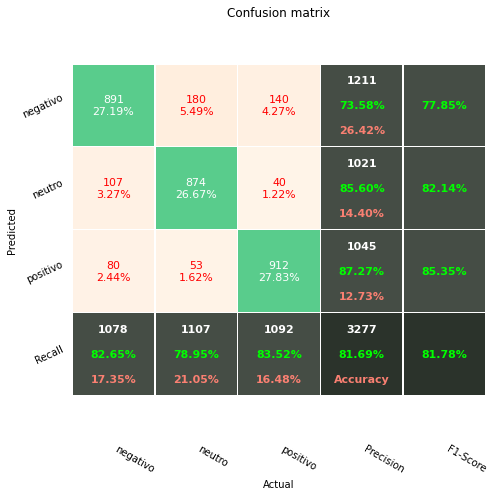

In [101]:
matriz_confusao(y_test_3, modelo3_pred_over)

### Validação cruzada - modelo 3

In [102]:
validacao_cruzada3 = cross_val_predict(modelo3_over, X_3, y_3, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79      4369
           1       0.84      0.81      0.83      4369
           2       0.88      0.85      0.86      4369

    accuracy                           0.83     13107
   macro avg       0.83      0.83      0.83     13107
weighted avg       0.83      0.83      0.83     13107

Acurácia: 0.8262

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        3560   495   314   4369
1         622  3555   192   4369
2         467   188  3714   4369
All      4649  4238  4220  13107 


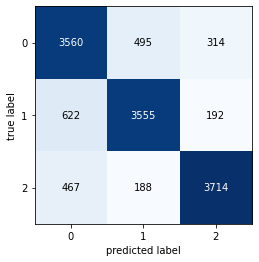

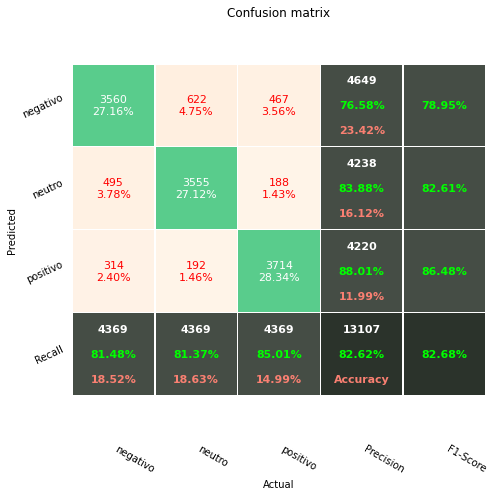

In [103]:
matriz_confusao(y_3, validacao_cruzada3)

## Modelo 4 (TfidfVectorizer e MultinomialNB)

In [104]:
modelo4_over = escolher_pipeline(4)
modelo4_over = modelo4_over.fit(X_train_3, y_train_3)
modelo4_pred_over = modelo4_over.predict(X_text_3)

In [105]:
modelo4_pred_over

array([2, 0, 1, ..., 1, 1, 1])

### Avaliando o modelo 4

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.74      0.84      0.78      1078
           1       0.86      0.80      0.83      1107
           2       0.89      0.83      0.86      1092

    accuracy                           0.82      3277
   macro avg       0.83      0.82      0.82      3277
weighted avg       0.83      0.82      0.82      3277

Acurácia: 0.8233

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0         903   108    67  1078
1         177   887    43  1107
2         144    40   908  1092
All      1224  1035  1018  3277 


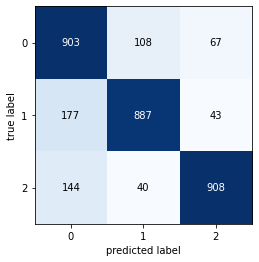

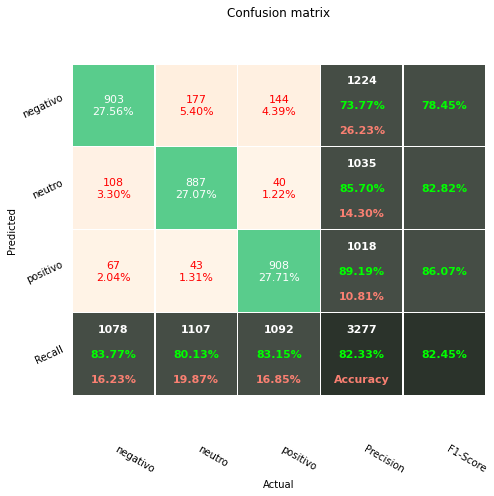

In [106]:
matriz_confusao(y_test_3, modelo4_pred_over)

### Validação cruzada - modelo 4

In [107]:
validacao_cruzada4 = cross_val_predict(modelo4_over, X_3, y_3, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80      4369
           1       0.84      0.81      0.83      4369
           2       0.89      0.85      0.87      4369

    accuracy                           0.83     13107
   macro avg       0.83      0.83      0.83     13107
weighted avg       0.83      0.83      0.83     13107

Acurácia: 0.8292

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        3610   477   282   4369
1         615  3560   194   4369
2         485   186  3698   4369
All      4710  4223  4174  13107 


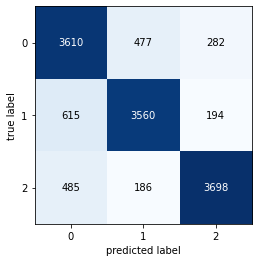

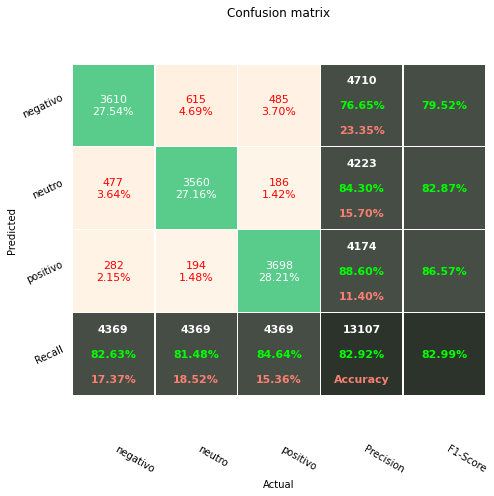

In [108]:
matriz_confusao(y_3, validacao_cruzada4)

## Gerando relatório dos modelos

In [109]:
# pegando o relatório de metricas dos modelos
report1 = metrics.classification_report(y_test_1, modelo1_pred_under, output_dict=True)
report2 = metrics.classification_report(y_test_1, modelo2_pred_under, output_dict=True)
report3 = metrics.classification_report(y_test_1, modelo3_pred_under, output_dict=True)
report4 = metrics.classification_report(y_test_1, modelo4_pred_under, output_dict=True)
report5 = metrics.classification_report(y_test_2, modelo1_pred_orig, output_dict=True)
report6 = metrics.classification_report(y_test_2, modelo2_pred_orig, output_dict=True)
report7 = metrics.classification_report(y_test_2, modelo3_pred_orig, output_dict=True)
report8 = metrics.classification_report(y_test_2, modelo4_pred_orig, output_dict=True)
report9 = metrics.classification_report(y_test_3, modelo1_pred_over, output_dict=True)
report10 = metrics.classification_report(y_test_3, modelo2_pred_over, output_dict=True)
report11 = metrics.classification_report(y_test_3, modelo3_pred_over, output_dict=True)
report12 = metrics.classification_report(y_test_3, modelo4_pred_over, output_dict=True)


In [110]:
# criando o dataframe para o relatório consolidado
columns = ['modelo', 'prec_neg', 'prec_neu', 'prec_pos', 'rec_neg', 'rec_neu', 'rec_pos', 'f1_neg', 'f1_neu', 'f1_pos', 'f1_media', 'accuracy']
report_df = pd.DataFrame(columns=columns)

In [111]:
report_df

,modelo,prec_neg,prec_neu,prec_pos,rec_neg,rec_neu,rec_pos,f1_neg,f1_neu,f1_pos,f1_media,accuracy


In [112]:
# criando a lista com o modelos de classificação
modelos = ['SGDClassifier_Count_under',
            'SGDClassifier_Tfidf_under',
            'MultinomialNB_Count_under',
            'MultinomialNB_Tfidf_under',
            'SGDClassifier_Count_orig',
            'SGDClassifier_Tfidf_orig',
            'MultinomialNB_Count_orig',
            'MultinomialNB_Tfidf_orig',
            'SGDClassifier_Count_over',
            'SGDClassifier_Tfidf_over',
            'MultinomialNB_Count_over',
            'MultinomialNB_Tfidf_over']

In [113]:
# criando a lista com os relatórios individuais
reports = [report1, 
            report2,
            report3,
            report4,
            report5,
            report6,
            report7,
            report8,
            report9,
            report10,
            report11,
            report12]

In [114]:
# loop para criação do relátorio consolidado
for i in range(len(modelos)):
    report_df.loc[i] = [modelos[i], 
                    round(reports[i]['0']['precision'], 2), 
                    round(reports[i]['1']['precision'], 2),
                    round(reports[i]['2']['precision'], 2),
                    round(reports[i]['0']['recall'], 2),
                    round(reports[i]['1']['recall'], 2),
                    round(reports[i]['2']['recall'], 2),
                    round(reports[i]['0']['f1-score'], 2),
                    round(reports[i]['1']['f1-score'], 2),
                    round(reports[i]['2']['f1-score'], 2),
                    round(reports[i]['weighted avg']['f1-score'], 2),
                    round(reports[i]['accuracy'], 2)] 

In [115]:
report_df.sort_values(by='accuracy', ascending=False, inplace=True)
report_df

,modelo,prec_neg,prec_neu,prec_pos,rec_neg,rec_neu,rec_pos,f1_neg,f1_neu,f1_pos,f1_media,accuracy
8,SGDClassifier_Count_over,0.90,0.85,0.93,0.82,0.93,0.93,0.86,0.89,0.93,0.89,0.89
0,SGDClassifier_Count_under,0.88,0.84,0.93,0.84,0.91,0.88,0.86,0.87,0.91,0.88,0.88
1,SGDClassifier_Tfidf_under,0.83,0.84,0.93,0.85,0.87,0.88,0.84,0.86,0.90,0.87,0.87
9,SGDClassifier_Tfidf_over,0.85,0.85,0.92,0.82,0.89,0.91,0.84,0.87,0.91,0.87,0.87
4,SGDClassifier_Count_orig,0.86,0.82,0.87,0.80,0.90,0.85,0.83,0.86,0.86,0.85,0.85
5,SGDClassifier_Tfidf_orig,0.82,0.82,0.86,0.81,0.85,0.83,0.81,0.84,0.84,0.83,0.83
10,MultinomialNB_Count_over,0.74,0.86,0.87,0.83,0.79,0.84,0.78,0.82,0.85,0.82,0.82
11,MultinomialNB_Tfidf_over,0.74,0.86,0.89,0.84,0.80,0.83,0.78,0.83,0.86,0.82,0.82
2,MultinomialNB_Count_under,0.70,0.82,0.86,0.83,0.74,0.78,0.76,0.78,0.82,0.79,0.78
3,MultinomialNB_Tfidf_under,0.68,0.82,0.87,0.84,0.74,0.76,0.75,0.78,0.82,0.78,0.78


In [116]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [117]:
# salvando o relatório consolidado em excel
report_df.to_excel("report_over_count.xlsx")